In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("../input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")
# this is done just to check if data is loaded.
df.sample (frac=0.02)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
11130,11131,Customer Service Technical Specialist,US,NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Technical Specialist will...,Qualifications:Experience performing data entr...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
3854,3855,"Video Journalist, Mandarin Service","US, DC, Washington",NaN,NaN,Applied Memetics LLC is a professional service...,The Video Journalist shall properly complete a...,The Video Journalist shall have at least five ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
1427,1428,Software Developer for Canada's Fastest-Growin...,"CA, ON, Burlington",NaN,50000-70000,NaN,Prodigy is the fastest-growing education game ...,What you’ll need:Strong background with core w...,Why you’ll love Prodigy:Huge growth opportunit...,0,0,1,Full-time,Associate,Bachelor's Degree,E-Learning,Information Technology,0
677,678,ServiceNow Consultant,"US, NY, PAINTED POST",NaN,NaN,NaN,Role: Service Now developer and administratorL...,"Required Skill(s) Tools Support (L4) , TIS Tec...",NaN,0,0,0,Contract,NaN,NaN,NaN,NaN,0
9068,9069,Big Data Developer,"EE, 37, Tallinn",IT,NaN,Our CompanyAdcash® is an international adverti...,"The Big Data Developer should be a vivid, enth...","Required skillsHands on experience with: PHP, ...",Friendly atmosphereHighly competitive salaryIn...,0,1,1,Full-time,Mid-Senior level,NaN,Marketing and Advertising,Information Technology,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2809,Senior Application Developer,NaN,digital,NaN,Since 1978Our goal has been to create engaging...,We are seeking a highly skilled Sr. #URL_01a73...,#URL_01a736d89d2f0b19de700923d2c312837e1804656...,"Energetic, creative team and workspaceWarehous...",0,1,1,Full-time,NaN,NaN,Marketing and Advertising,NaN,0
17640,17641,Customer Service Associate,"US, FL, Tampa",NaN,NaN,NaN,We are seeking individuals to be connected wit...,Home Office SuppliesComputer with internet acc...,NaN,1,0,0,NaN,Entry level,Some High School Coursework,NaN,Administrative,1
3463,3464,Business Development Manager,"US, CA, San Francisco",Sales,NaN,NaN,We are currently looking for a client-focused ...,The successful candidate will:Be an enthusiast...,NaN,0,0,1,Full-time,NaN,High School or equivalent,Wholesale,Sales,1
3161,3162,Client Care Specialist - Criminal Justice,"CA, BC, Vancouver",Legal,NaN,Pardon Services Canada is a national legal ser...,Pardon Services Canada is an established entre...,Background in criminal justiceAdvocacy skillsC...,Medical and dental coverage.$32K-$36K compensa...,0,1,1,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#checking the number of rows and columns
df.shape

(17880, 18)

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
#  Think about the model. 
#  State the hypothesised relationships between a dependent variable and casual factors as specifically possible. 
#   Are they theoritically plausible?
#   1) Does the job title indicate the job is fradulent?
#   ans) job title along doesn't indicate the job is fradulent.fradulent =f(title,other predictors)
#   other attributes that alone don't define if the job is fradulent--location, department, salary_range,benefits,




In [6]:
#works only with numerical columns
df.describe() 

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
"""Missing values"""
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
#setting threshold for imputation at 40 percent
df.isna().sum() / len(df)


job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [9]:
df.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)

In [10]:
"""Extracting Text Featurs"""

text_df = df[["title", "company_profile", "description", "requirements","fraudulent"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


In [11]:
"""Catagorical Feature"""
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
# seeing the distribution of the target variable
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

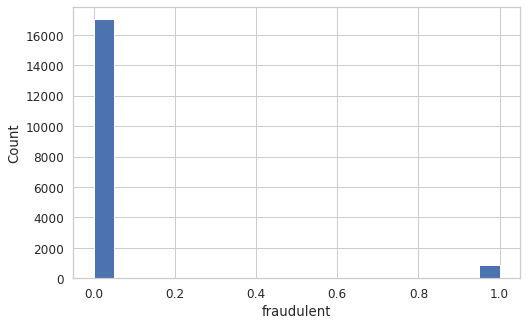

In [13]:
#visualization seaborn
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['fraudulent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='fraudulent', ylabel='Count');

#conclussion: # the target variable is highly imbalanced. 


CPU times: user 34.9 s, sys: 816 ms, total: 35.7 s
Wall time: 35.9 s


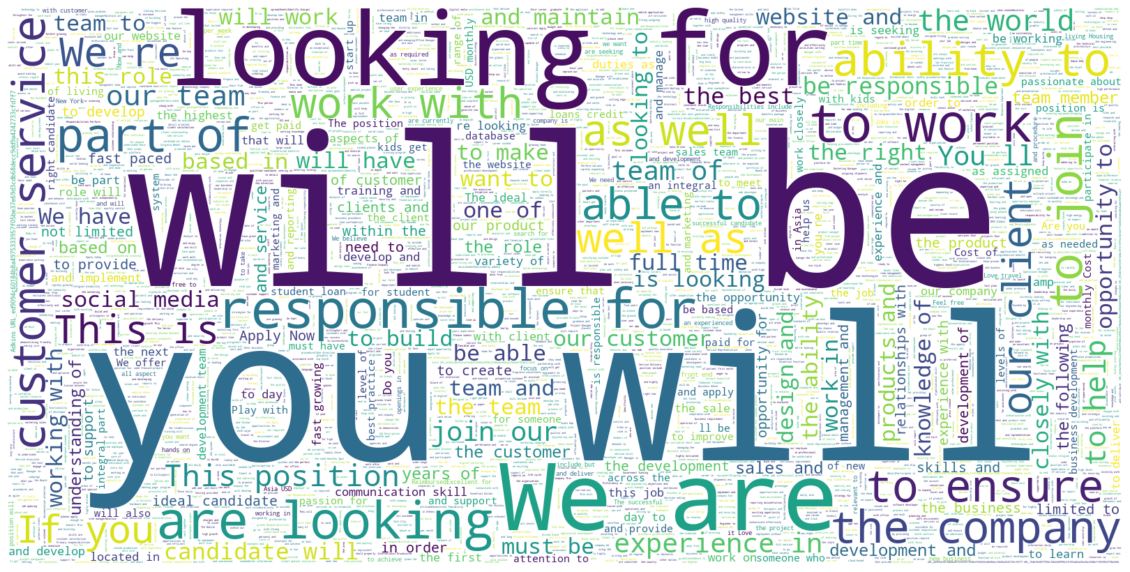

In [14]:
%%time
#word cloud visualization based on the frequency
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('no_fraud_cloud.jpeg')


In [15]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' '  + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [16]:
df['text']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth  SpotSo...
                               ...                        
17875                                                  NaN
17876    Payroll Accountant US, PA, Philadelphia  WebLi...
17877                                                  NaN
17878                                                  NaN
17879                                                  NaN
Name: text, Length: 17880, dtype: object

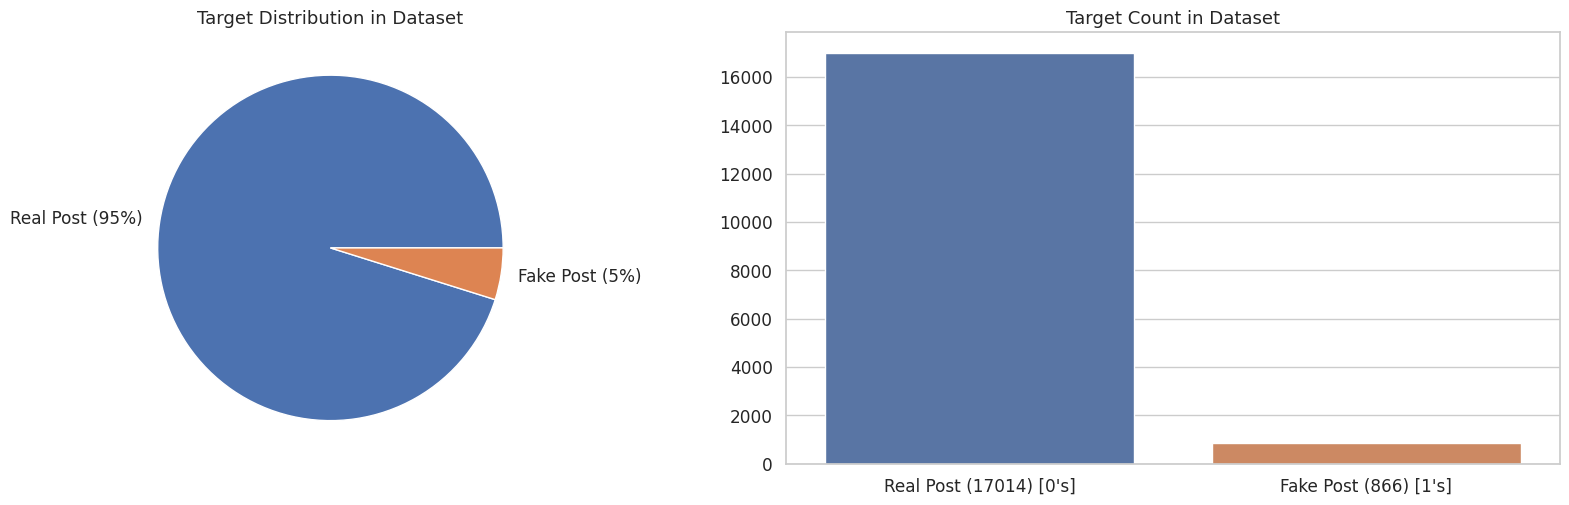

In [17]:
#visualization using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

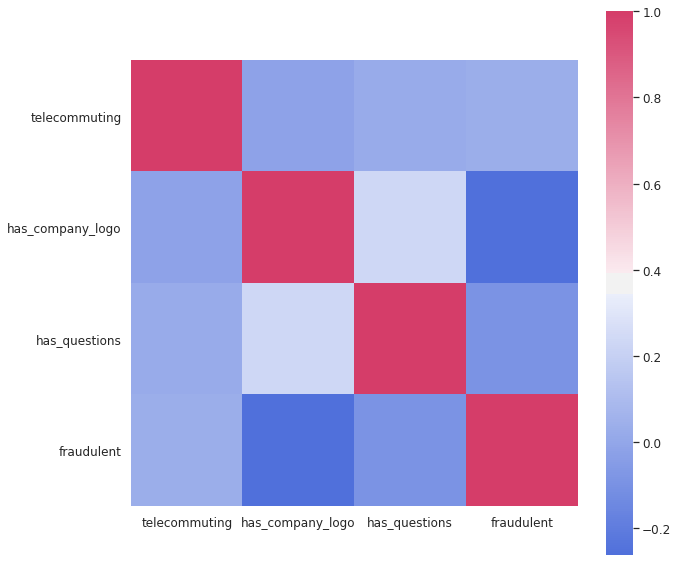

In [18]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [19]:
df.drop(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'], axis = 1, inplace = True)

In [20]:
#Bert implementation

new_text = text_df[text_df.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
target = df['fraudulent']

In [21]:
new_text

0        Marketing Intern,We're Food52, and we've creat...
1        Customer Service - Cloud Video Production,90 S...
2        Commissioning Machinery Assistant (CMA),Valor ...
3        Account Executive - Washington DC,Our passion ...
4        Bill Review Manager,SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution ,Vend is looki...
17876    Payroll Accountant,WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer, ,Nemsia Studios is looking f...
17879    Web Application Developers,Vend is looking for...
Length: 17880, dtype: object

In [22]:
%%time
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to both test and training datasets
new_text = new_text.apply(lambda x: clean_text(x))
new_text.head(3)

# #go for batch processing if the system takes time
batch1 = new_text[:6000]
target1 = target[:6000]
# target1.value_counts()

CPU times: user 16.8 s, sys: 57.8 ms, total: 16.9 s
Wall time: 17.1 s


In [23]:
# importing the tools 
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [24]:
%%time
# DistilBERT
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

CPU times: user 1 s, sys: 424 ms, total: 1.43 s
Wall time: 2.36 s


In [25]:
%%time
# Tokenization
tokenized = batch1.apply((lambda x: tokenizer.encode(x, max_length = 60, add_special_tokens=False)))
tokenized.shape

CPU times: user 1min 39s, sys: 229 ms, total: 1min 39s
Wall time: 1min 40s


(6000,)

In [26]:
%%time
# Padding ==> convert 1D array to 2D array
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

CPU times: user 113 ms, sys: 3 ms, total: 116 ms
Wall time: 118 ms


(6000, 60)

In [27]:
%%time
# Masking ==>  ignore (mask) the padding we've added
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

CPU times: user 1.94 ms, sys: 0 ns, total: 1.94 ms
Wall time: 2.75 ms


(6000, 60)

In [28]:
%%time
# Deep Learning
input_ids = torch.tensor(padded)  
# input_ids = torch.tensor(input_ids).to(torch.int32)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

last_hidden_states[0].shape

CPU times: user 4min 6s, sys: 1min 12s, total: 5min 18s
Wall time: 5min 21s


torch.Size([6000, 60, 768])

In [29]:
features = last_hidden_states[0][:,0,:].numpy()
labels = target1

In [30]:
# model
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold, cross_val_score

In [31]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [32]:
train_features

array([[ 0.23644322,  0.22084694,  0.13010278, ..., -0.59650993,
        -0.06612256, -0.01854422],
       [ 0.07175702,  0.16020371,  0.36842665, ..., -0.61798453,
         0.04379271, -0.15217482],
       [-0.10925986,  0.48787647,  0.08431844, ..., -0.24314462,
        -0.11708431,  0.08121714],
       ...,
       [ 0.16993432,  0.0287534 ,  0.5270923 , ..., -0.22915715,
         0.09438509,  0.07263206],
       [ 0.04569846,  0.41554376,  0.1852543 , ..., -0.33363366,
        -0.0790568 , -0.03724168],
       [ 0.20042634,  0.14974679,  0.24998072, ..., -0.50870305,
         0.15511744, -0.14249183]], dtype=float32)

In [33]:
train_labels

1850    0
4945    0
5469    0
3228    0
4964    0
       ..
4066    0
5595    0
4920    0
2540    0
5822    0
Name: fraudulent, Length: 4500, dtype: int64

In [34]:
test_features

array([[ 0.16821541,  0.34415704, -0.02480092, ..., -0.39499474,
         0.08207671, -0.02251849],
       [ 0.14177261,  0.35070148,  0.23666519, ..., -0.53986377,
         0.05831607,  0.0950171 ],
       [ 0.19772783,  0.40634516,  0.33646092, ..., -0.23765343,
         0.14285478,  0.02442247],
       ...,
       [ 0.40979066,  0.32998013,  0.21124296, ..., -0.3863472 ,
         0.17150873, -0.18884225],
       [ 0.06319984,  0.0783308 ,  0.3580766 , ..., -0.7386735 ,
         0.07143209, -0.19610089],
       [ 0.1700633 ,  0.37723732,  0.19561328, ..., -0.595467  ,
         0.09643388,  0.13248284]], dtype=float32)

In [35]:
train_labels

1850    0
4945    0
5469    0
3228    0
4964    0
       ..
4066    0
5595    0
4920    0
2540    0
5822    0
Name: fraudulent, Length: 4500, dtype: int64

In [36]:
Model_Score = []
Model_Name = []

In [37]:
%%time
# train default para
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#ValueError: Negative values in data passed to MultinomialNB (input X)
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
lr_clf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

lr_clf.fit(train_features, train_labels)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.2min finished


CPU times: user 27.7 s, sys: 156 ms, total: 27.8 s
Wall time: 6min 37s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
             scoring='roc_auc', verbose=1)

In [38]:
log_reg_pred = lr_clf.predict(test_features)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, log_reg_pred)

array([[1444,    0],
       [  35,   21]])

In [40]:
from sklearn.metrics import classification_report
print (classification_report(test_labels, log_reg_pred))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1444
           1       1.00      0.38      0.55        56

    accuracy                           0.98      1500
   macro avg       0.99      0.69      0.77      1500
weighted avg       0.98      0.98      0.97      1500



In [41]:
from sklearn.metrics import roc_auc_score
print (roc_auc_score(test_labels, log_reg_pred))


0.6875


In [42]:
Model_Name.append('MultinomialNB')
Model_Score.append(round(roc_auc_score(test_labels, log_reg_pred), 4))

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']

param_grid = dict(C = c_values, penalty = penalty_options)

In [44]:
from sklearn.model_selection import GridSearchCV

grid_tfidf = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)


In [45]:
grid_tfidf.fit(train_features, train_labels)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.3s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [46]:

grid_tfidf.best_params_

{'C': 1, 'penalty': 'l2'}

In [47]:

grid_tfidf.best_score_

0.9409302325581395

In [48]:
log_reg_pred = grid_tfidf.predict(test_features)

In [49]:
print (roc_auc_score(test_labels, log_reg_pred))


0.7396863870201821


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, log_reg_pred)

array([[1440,    4],
       [  29,   27]])

In [51]:
print (classification_report(test_labels, log_reg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1444
           1       0.87      0.48      0.62        56

    accuracy                           0.98      1500
   macro avg       0.93      0.74      0.80      1500
weighted avg       0.98      0.98      0.97      1500



In [53]:
Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(test_labels, log_reg_pred), 4))

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()